In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RANSACRegressor
import seaborn as sns
import scipy as sp
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
import tensorflow.contrib.keras as keras
import tensorflow as tf
import keras
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
#np.set_printoptions(suppress=True)
#np.set_printoptions(np.inf)
import matplotlib.pyplot as pl
import statsmodels.api as sm
pd.set_option('display.max_rows', 500)
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', 500)
train=pd.read_csv("C:/Users/Arata Yamamoto/Documents/データ/train.csv")
test=pd.read_csv("C:/Users/Arata Yamamoto/Documents/データ/test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
train["GarageYrBlt"].value_counts()
print(train.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
#欠損地処理
train=pd.get_dummies(train,dummy_na=True)
train['LotFrontage']=train['LotFrontage'].interpolate(method='linear', limit_direction='forward', limit_area='inside')
train['GarageYrBlt_dummy']=train["GarageYrBlt"].apply(lambda x: 0 if type(x) == float else 1)
train['MasVnrArea_dummy']=train["MasVnrArea"].apply(lambda x: 0 if type(x) == float else 1)
train.head()
print(train.isnull().sum())


Id                        0
MSSubClass                0
LotFrontage               0
LotArea                   0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
MasVnrArea                8
BsmtFinSF1                0
BsmtFinSF2                0
BsmtUnfSF                 0
TotalBsmtSF               0
1stFlrSF                  0
2ndFlrSF                  0
LowQualFinSF              0
GrLivArea                 0
BsmtFullBath              0
BsmtHalfBath              0
FullBath                  0
HalfBath                  0
BedroomAbvGr              0
KitchenAbvGr              0
TotRmsAbvGrd              0
Fireplaces                0
GarageYrBlt              81
GarageCars                0
GarageArea                0
WoodDeckSF                0
OpenPorchSF               0
EnclosedPorch             0
3SsnPorch                 0
ScreenPorch               0
PoolArea                  0
MiscVal                   0
MoSold              

(array([107., 554., 535., 189.,  57.,  12.,   2.,   2.,   1.,   1.]),
 array([ 334. ,  864.8, 1395.6, 1926.4, 2457.2, 2988. , 3518.8, 4049.6,
        4580.4, 5111.2, 5642. ]),
 <a list of 10 Patch objects>)

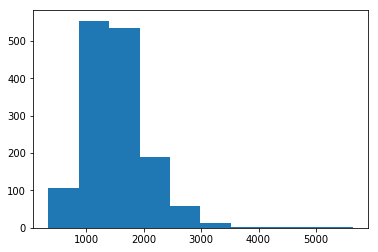

In [11]:
plt.hist(train['GrLivArea'])


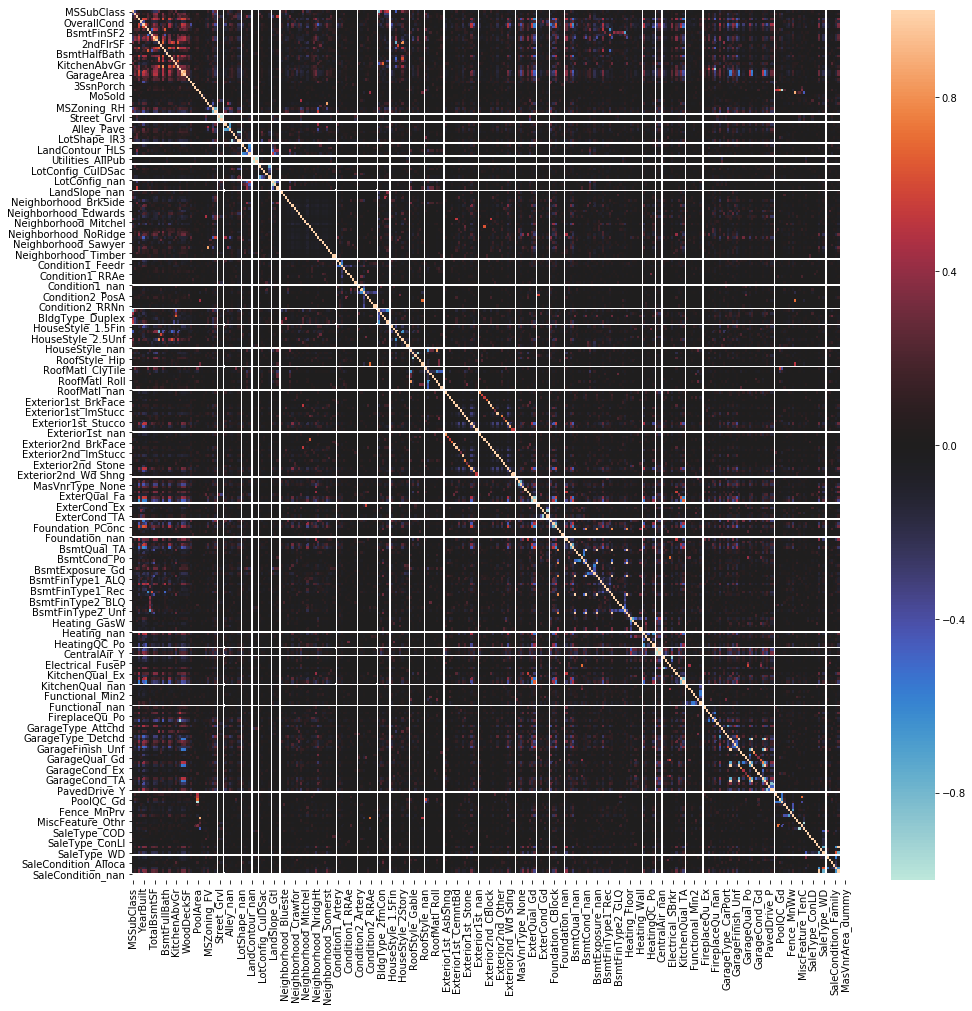

In [22]:
y=train['SalePrice'].values
X=train.drop(['SalePrice','GarageYrBlt','MasVnrArea','Id'],axis=1).values
X_column=train.drop(['SalePrice','GarageYrBlt','MasVnrArea','Id'],axis=1)
columns=X_column.columns
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.3, random_state=0,
)
X_corr=train.drop(['SalePrice','GarageYrBlt','MasVnrArea','Id'],axis=1)
heatmap=X_corr.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
sns.heatmap(heatmap, vmax=1, vmin=-1, center=0)


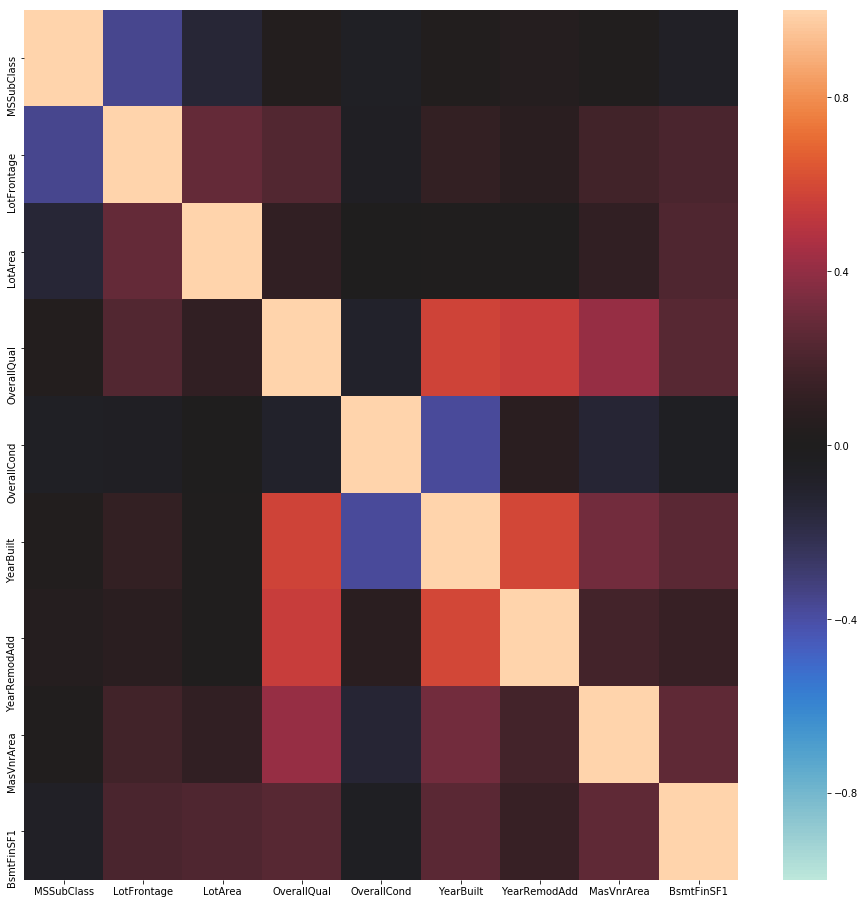

In [25]:
X_corr2=train.iloc[:,1:10]
heatmap2=X_corr2.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
sns.heatmap(heatmap2, vmax=1, vmin=-1, center=0)


C:\Users\Arata Yamamoto\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Arata Yamamoto\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<class 'seaborn.axisgrid.PairGrid'>


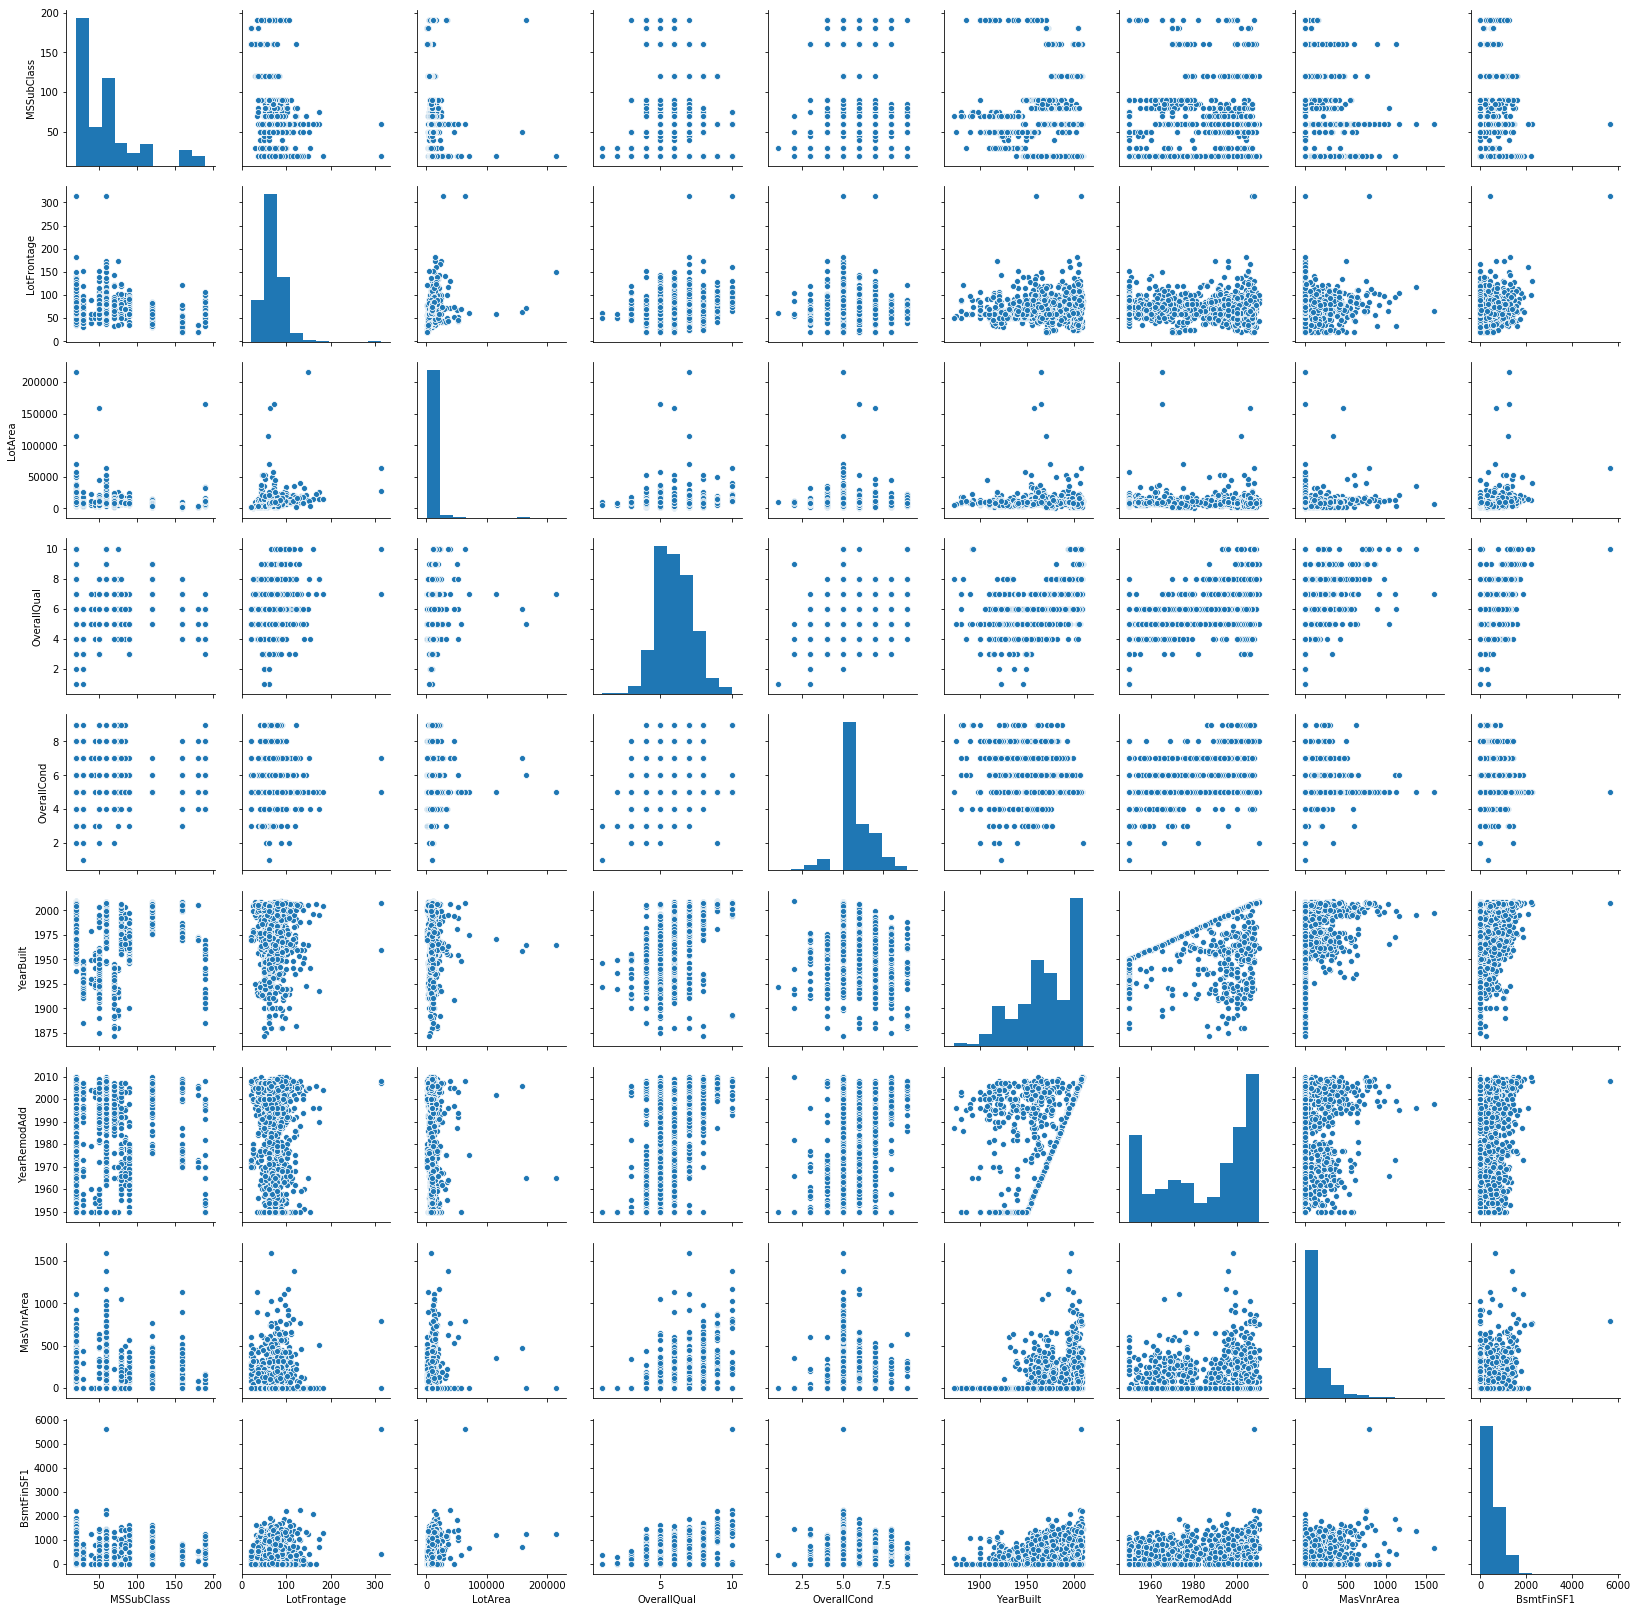

In [26]:
pg = sns.pairplot(X_corr2)
print(type(pg))

In [5]:
lr=LinearRegression(normalize=False)

lr.fit(X_train,y_train)
lr.score(X_train,y_train)

# matplotlib パッケージを読み込み
import matplotlib.pyplot as pl

y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

R^2 train: 0.948, test: 0.611


In [36]:
import statsmodels.api as sm
logit = sm.OLS(y_train, X_train)
X_train=sm.add_constant(X_train)
result = logit.fit()
result.summary2()

C:\Users\Arata Yamamoto\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Arata Yamamoto\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Arata Yamamoto\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Arata Yamamoto\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:               OLS               Adj. R-squared:      0.931     
Dependent Variable:  y                 AIC:                 23399.1092
Date:                2019-08-21 07:58  BIC:                 24592.0523
No. Observations:    1022              Log-Likelihood:      -11458.   
Df Model:            241               F-statistic:         58.45     
Df Residuals:        780               Prob (F-statistic):  0.00      
R-squared:           0.948             Scale:               4.1933e+08
----------------------------------------------------------------------
         Coef.      Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------
x1        -14.1338    90.9283 -0.1554 0.8765    -192.6270     164.3593
x2         73.9955    45.6171  1.6221 0.1052     -15.5513     163.5423
x3          0.9883     0.1217  8.1227 0.0000       0.7495       1.2271
x4       6460.9121  1161.2563  5.5637 0.0000    4181.3544    8740.4699
x5       5093.8777   976.1536  5.2183 0.0000    3177.6784    7010.0769
x6        323.9215    90.8595  3.5651 0.0004     145.5633     502.2797
x7        121.3028    63.6705  1.9052 0.0571      -3.6831     246.2887
x8         14.2427     3.3158  4.2954 0.0000       7.7338      20.7517
x9          8.0039     6.6371  1.2059 0.2282      -5.0249      21.0326
x10         1.9461     3.1043  0.6269 0.5309      -4.1476       8.0398
x11        24.1927     4.7161  5.1298 0.0000      14.9349      33.4504
x12         1.6371     7.6951  0.2127 0.8316     -13.4685      16.7427
x13        29.0223     6.3293  4.5854 0.0000      16.5978      41.4469
x14        15.4607    16.5981  0.9315 0.3519     -17.1216      48.0430
x15        46.1201     6.8444  6.7384 0.0000      32.6845      59.5558
x16      2192.5976  2207.1397  0.9934 0.3208   -2140.0397    6525.2348
x17      5016.6374  3549.3709  1.4134 0.1579   -1950.8132   11984.0879
x18      5456.0968  2526.8561  2.1592 0.0311     495.8531   10416.3405
x19      2221.3468  2474.2892  0.8978 0.3696   -2635.7076    7078.4013
x20     -3860.1331  1600.9157 -2.4112 0.0161   -7002.7467    -717.5195
x21    -12142.5242  6472.1535 -1.8761 0.0610  -24847.4263     562.3779
x22       584.5267  1067.2893  0.5477 0.5841   -1510.5729    2679.6264
x23      1198.9729  2924.5304  0.4100 0.6819   -4541.9095    6939.8552
x24     -1008.0808  2736.7272 -0.3684 0.7127   -6380.3037    4364.1421
x25        31.9312     9.2645  3.4466 0.0006      13.7449      50.1175
x26        17.8886     6.3876  2.8005 0.0052       5.3497      30.4275
x27        18.6854    12.3534  1.5126 0.1308      -5.5644      42.9352
x28        12.1625    14.0584  0.8651 0.3872     -15.4343      39.7593
x29         7.8608    25.1491  0.3126 0.7547     -41.5071      57.2287
x30        21.2263    13.9132  1.5256 0.1275      -6.0854      48.5381
x31       165.5541   226.7741  0.7300 0.4656    -279.6058     610.7140
x32         4.3710     6.0201  0.7261 0.4680      -7.4464      16.1885
x33      -272.3508   276.7837 -0.9840 0.3254    -815.6800     270.9783
x34      -449.8974   578.7126 -0.7774 0.4372   -1585.9161     686.1213
x35    -27037.7366 27910.0978 -0.9687 0.3330  -81825.5377   27750.0646
x36     12736.6425 26827.2426  0.4748 0.6351  -39925.5030   65398.7880
x37     -6261.7827 26091.0551 -0.2400 0.8104  -57478.7849   44955.2195
x38     -1322.9434 25760.8751 -0.0514 0.9591  -51891.7988   49245.9120
x39     -1911.5075 25997.5888 -0.0735 0.9414  -52945.0343   49122.0192
const      -0.0000     0.0000 -0.2390 0.8112      -0.0000       0.0000
x40    -30831.6416 64713.6566 -0.4764 0.6339 -157865.1967   96201.9135
x41      7034.3139 64884.8710  0.1084 0.9137 -120335.3369  134403.9648
x42        -0.0000     0.0000 -0.1747 0.8614      -0.0000       0.0000
x43     -8744.3697 43111.9768 -0.2028 0.8393  -93373.6113   75884.

In [28]:
lasso = Lasso(alpha=1000)
lasso.fit(X_train, y_train)
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

y_correct=y_test-y_test_pred
print(y_correct.mean())

R^2 train: 0.863, test: 0.738
-42.754954905183794


In [18]:
#欠損値処理
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
kesson_1=["Alley","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]
kesson_2=["LotFrontage","Alley","GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]
for i in kesson_1:
    train[i] = le.fit_transform(train[i].astype(str))

for i in kesson_2:
    train[i]=train[i].fillna(train[i].median())



KeyError: 'Alley'

In [19]:
train["GarageType2"] = le.fit_transform(train['GarageType'].astype(str))
train["GarageType2"].value_counts()

KeyError: 'GarageType'

In [29]:
train=pd.get_dummies(train,dummy_na=True)
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQ

In [25]:
#変数作成
train_dummy=train.drop(["LotFrontage","Alley","LotArea","YearBuilt","YearRemodAdd","MasVnrType","MasVnrArea","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","Fireplaces","FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea" ,"GarageQual" ,"GarageCond","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","PoolQC","Fence","MiscFeature","MiscVal","MoSold","YrSold"], axis=1)

train_dummy=pd.get_dummies(train_dummy)
train_missingnumeric=train[["Id","LotFrontage","Alley","LotArea","YearBuilt","YearRemodAdd","MasVnrType","MasVnrArea","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","Fireplaces","FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea" ,"GarageQual" ,"GarageCond","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","PoolQC","Fence","MiscFeature","MiscVal","MoSold","YrSold"]]

train=pd.get_dummies(train)
train.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQua

In [127]:
train=train.dropna()
x = train.drop(['Id','SalePrice'], axis=1)
x_train=x.values
y_train=train['SalePrice'].values
lr=linear_model.LinearRegression()

lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.score(x_train, y_train))
#print("coefficient = ", lr.coef_)
'''print("intercept = ", lr.intercept_)
param=lr.intercept_
param=param.ravel()

param2=lr.coef_
param2=param2.ravel()
param2

param2=np.append(param2,param)

param2'''

TypeError: integer argument expected, got float

In [120]:
train=train.dropna()
X = train.drop(['Id','SalePrice'], axis=1)
X = sm.add_constant(X)
Y = train['SalePrice']
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

C:\Users\Arata Yamamoto\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Arata Yamamoto\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Arata Yamamoto\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Arata Yamamoto\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     54.93
Date:                Mon, 12 Aug 2019   Prob (F-statistic):               0.00
Time:                        22:51:42   Log-Likelihood:                -12734.
No. Observations:                1121   AIC:                         2.595e+04
Df Residuals:                     880   BIC:                         2.716e+04
Df Model:                         240                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass               12.2139    122.992      0.099      0.921    -229.179     253.606
LotFrontage              74.4866     56.380      1.321      0.187     -36.169     185.142
LotArea                   0.8143      0.152      5.356      0.000       0.516       1.113
OverallQual            6854.5774   1283.640      5.340      0.000    4335.224    9373.930
OverallCond            5765.4004   1138.316      5.065      0.000    3531.270    7999.531
YearBuilt               250.8814    101.142      2.480      0.013      52.374     449.389
YearRemodAdd            106.3161     70.948      1.499      0.134     -32.932     245.564
MasVnrArea               24.3209      6.698      3.631      0.000      11.174      37.467
BsmtFinSF1               15.9957      3.604      4.438      0.000       8.922      23.069
BsmtFinSF2                9.2511      7.514      1.231      0.219      -5.496      23.998
BsmtUnfSF                -1.7603      3.519     -0.500      0.617      -8.666       5.146
TotalBsmtSF              23.4860      5.207      4.511      0.000      13.267      33.705
1stFlrSF                  8.5729      9.712      0.883      0.378     -10.489      27.635
2ndFlrSF                 28.2724      8.051      3.511      0.000      12.470      44.075
LowQualFinSF             -3.0886     22.775     -0.136      0.892     -47.788      41.611
GrLivArea                33.7582      8.687      3.886      0.000      16.708      50.808
BsmtFullBath            917.0806   2412.135      0.380      0.704   -3817.129    5651.290
BsmtHalfBath            874.9285   3725.956      0.235      0.814   -6437.868    8187.725
FullBath               5054.9607   2781.470      1.817      0.070    -404.129    1.05e+04
HalfBath               2094.4271   2594.899      0.807      0.420   -2998.486    7187.340
BedroomAbvGr          -4247.9168   1744.904     -2.434      0.015   -7672.576    -823.258
KitchenAbvGr          -1.802e+04   8354.517     -2.157      0.031   -3.44e+04   -1624.900
TotRmsAbvGrd           1655.6327   1171.834      1.413      0.158    -644.282    3955.547
Fireplaces             6905.8958   3254.758      2.122      0.034     517.901    1.33e+04
GarageYrBlt             -23.9168     74.006     -0.323      0.747    -169.166     121.332
GarageCars             4581.7349   2685.448      1.706      0.088    -688.895    9852.365
GarageArea               17.0474      9.362      1.821      0.069      -1.327      35.422
WoodDeckSF               12.7547      7.347      1.736      0.083      -1.665      27.175
OpenPorchSF               3.1183     15.032      0.207      0.836     -26.385      32.622
EnclosedPorch            12.3684     16.120      0.767      0.443     -19.270      44.007
3SsnPorch                42.0618     25.808      1.630      0.104      -8.591      92.714
ScreenPorch            